In [1]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import utils as utils
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import and read the data
data = pd.read_csv("data/top_10000_1960-now.csv")
data.head(75)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.01580,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.01420,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.56000,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.56800,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.67500,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,spotify:track:33XpXmKmVTopPKnxTgbVOD,True Colours,spotify:artist:6uATIQFyydDXPc2RlLzcUE,Kasey Chambers,spotify:album:5edluM30Us1pl4LA8umamH,Storybook,spotify:artist:6uATIQFyydDXPc2RlLzcUE,Kasey Chambers,2011-09-23,https://i.scdn.co/image/ab67616d0000b273e741bd...,...,0.0297,0.64000,0.000002,0.0850,0.236,86.952,4.0,NaN,Bloodlines,"C 2011 Bloodlines, P 2011 Bloodlines"
71,spotify:track:093UVG0vgKjxj4UDjLIulw,Set Adrift On Memory Bliss,spotify:artist:5DgjOwTN6o76J5Gf8MzEoL,P.M. Dawn,spotify:album:6eUVsZ7movjdgq0PB0hvSW,Let It Flow,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,1999-04-23,https://i.scdn.co/image/ab67616d0000b273b9727e...,...,0.0777,0.00682,0.200000,0.5370,0.587,99.773,4.0,NaN,Grm Game,"C 1999 Grm Game, P 1999 Grm Game"
72,spotify:track:043bfUkTydw0xJ5JjOT91w,Don't You Worry Child,"spotify:artist:1h6Cn3P4NGzXbaXidqURXs, spotify...","Swedish House Mafia, John Martin",spotify:album:4ljisoNarj0BpQSMIEv88L,Until Now,spotify:artist:1h6Cn3P4NGzXbaXidqURXs,Swedish House Mafia,2012-01-01,https://i.scdn.co/image/ab67616d0000b273781f6d...,...,0.0463,0.01440,0.002100,0.1180,0.338,129.007,4.0,NaN,Virgin Records,"C © 2012 EMI Records Ltd, P ℗ 2012 EMI Records..."
73,spotify:track:4qjrCkcVbsYlitCqbBkeKe,Colors Of The Wind - End Title,spotify:artist:75L9s8KVrhCNtBUkZFnDFW,Vanessa Williams,spotify:album:4ddvFk8agFfRkkcVwR8sJH,Pocahontas Original Soundtrack (English Version),spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,1995-01-01,https://i.scdn.co/image/ab67616d0000b273

In [3]:
data.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [4]:
# Drop unnecessary columns
data = data.drop(['Artist URI(s)', 'Album URI', 'Album Artist URI(s)', 'Album Artist Name(s)', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Track Preview URL', 'ISRC', 'Added By',
       'Added At', 'Loudness', 'Mode', 'Album Genres', 'Copyrights'], axis=1)

In [5]:
# Dropping null columns
df_cleaned = data.dropna(how="any")

In [6]:
# Reset index on dataframe
df_cleaned = df_cleaned.reset_index()

utils.eda(df_cleaned)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               9445 non-null   int64  
 1   Track URI           9445 non-null   object 
 2   Track Name          9445 non-null   object 
 3   Artist Name(s)      9445 non-null   object 
 4   Album Name          9445 non-null   object 
 5   Album Release Date  9445 non-null   object 
 6   Album Image URL     9445 non-null   object 
 7   Explicit            9445 non-null   bool   
 8   Popularity          9445 non-null   int64  
 9   Artist Genres       9445 non-null   object 
 10  Danceability        9445 non-null   float64
 11  Energy              9445 non-null   float64
 12  Key                 9445 non-null   float64
 13  Speechiness         9445 non-null   float64
 14  Acousticness        9445 non-null   float64
 15  Instrumentalness    9445 non-null   float64
 16  Livene

(None,
 index                 0
 Track URI             0
 Track Name            0
 Artist Name(s)        0
 Album Name            0
 Album Release Date    0
 Album Image URL       0
 Explicit              0
 Popularity            0
 Artist Genres         0
 Danceability          0
 Energy                0
 Key                   0
 Speechiness           0
 Acousticness          0
 Instrumentalness      0
 Liveness              0
 Valence               0
 Tempo                 0
 Time Signature        0
 Label                 0
 dtype: int64)

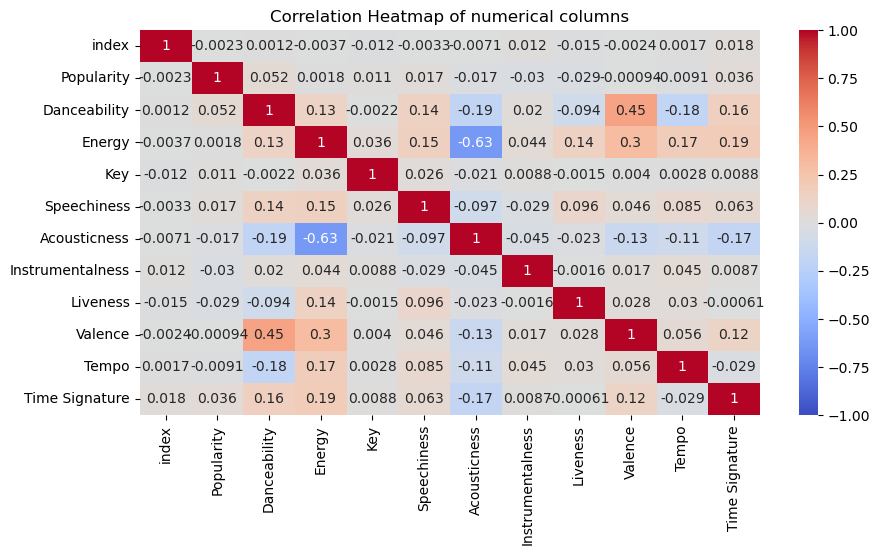

In [7]:
utils.plot_correlation_heatmap(df_cleaned)

DISTRIBUTION OF DATA IN NUMERICAL COLUMNS


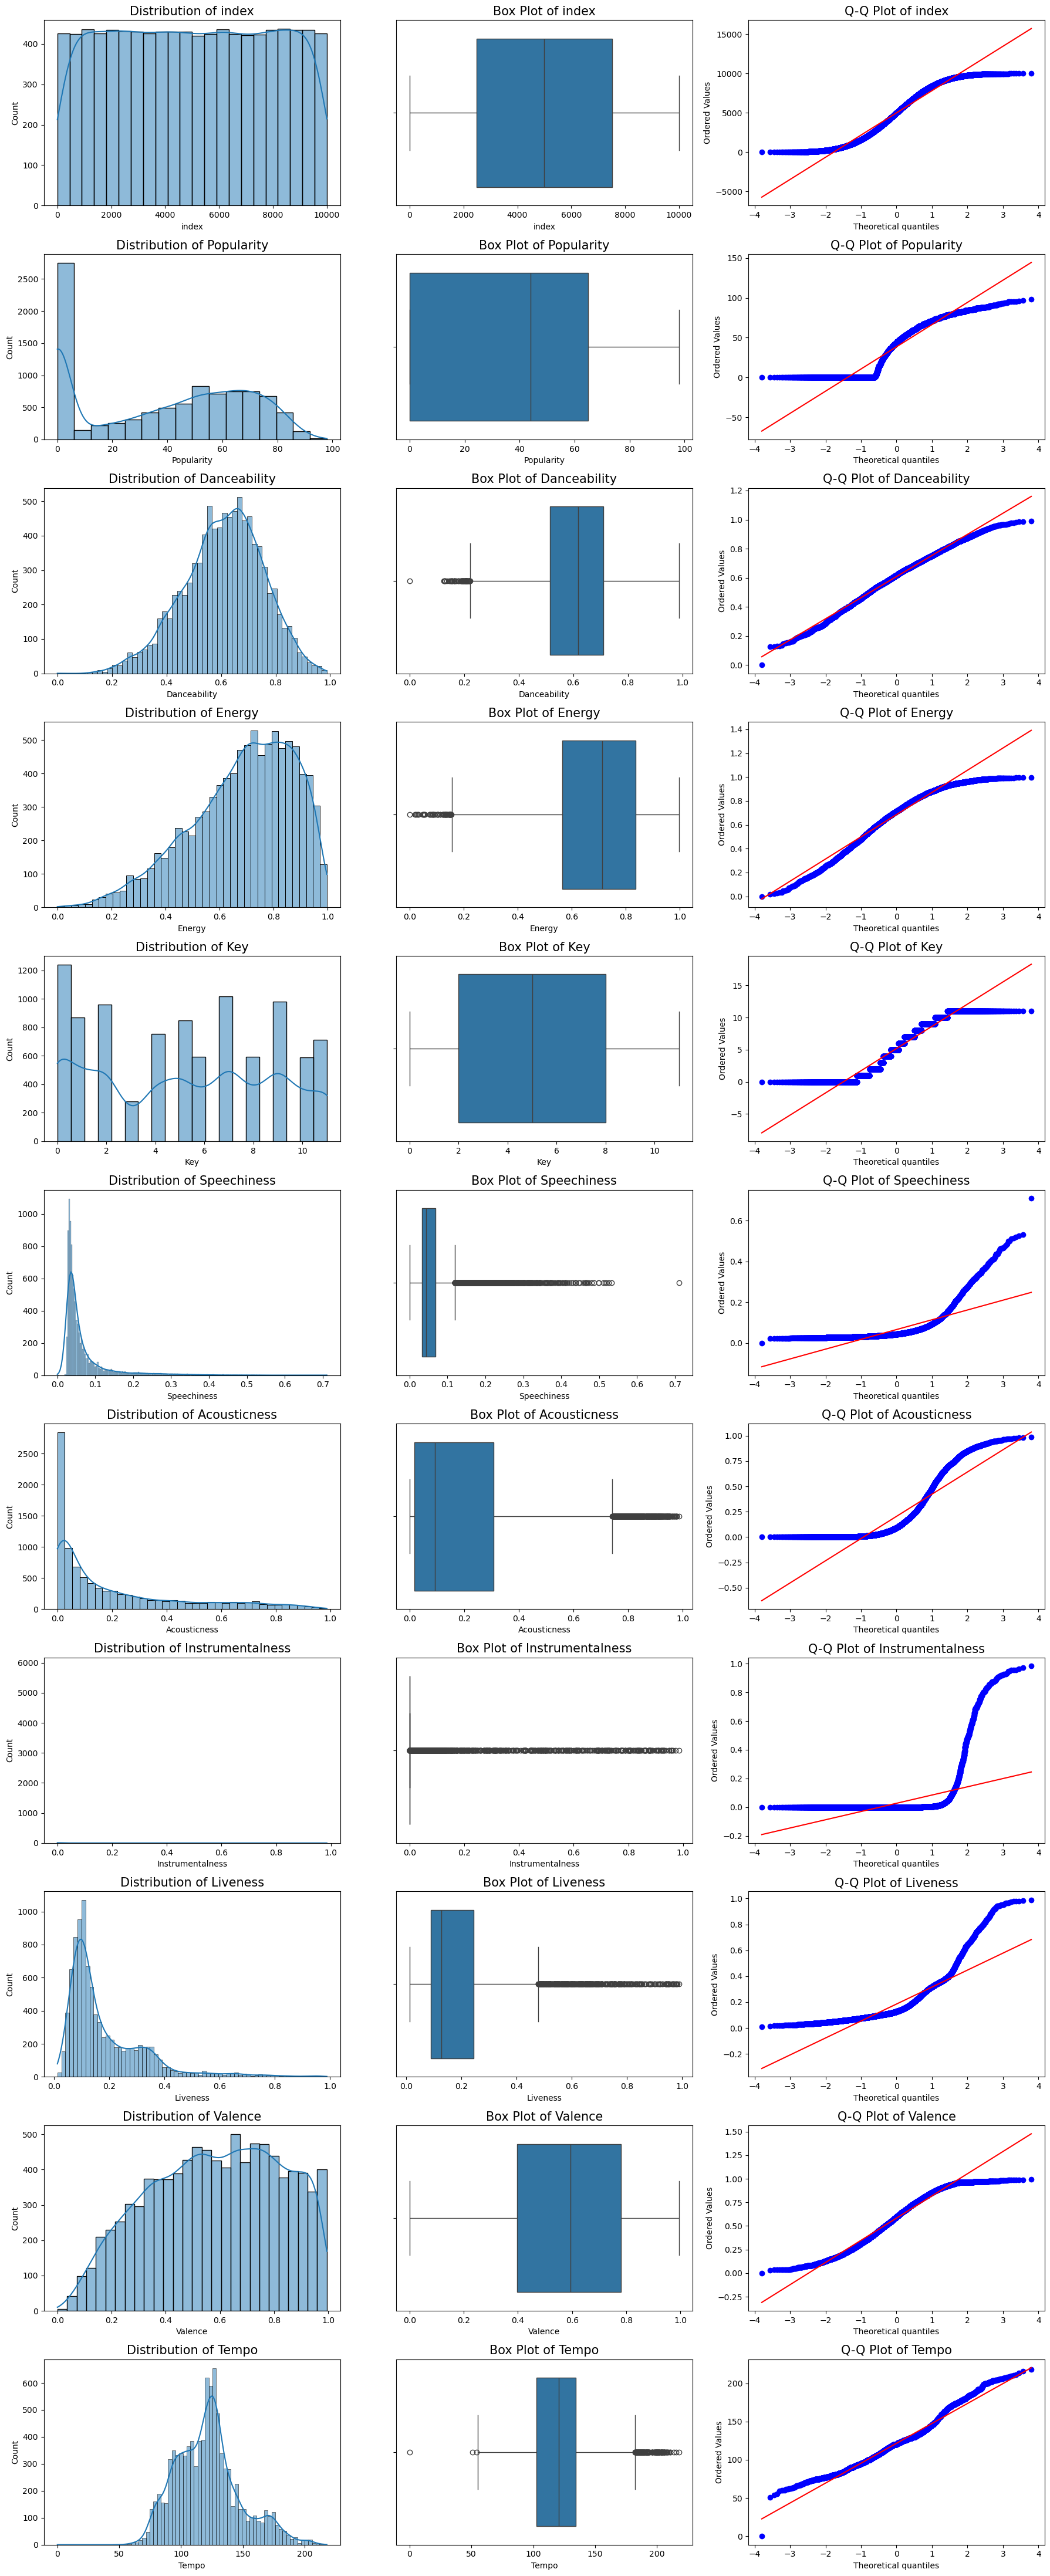

In [8]:
utils.plot_numeric_distributions(df_cleaned)

In [9]:
df_cleaned.head(5)

,index,Track URI,Track Name,Artist Name(s),Album Name,Album Release Date,Album Image URL,Explicit,Popularity,Artist Genres,...,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,False,0,"acid house,ambient house,big beat,hip house",...,0.872,8.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,False,64,"dance pop,miami hip hop,pop",...,0.743,2.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,False,56,"dance pop,pop",...,0.665,7.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive
3,3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,False,42,"album rock,art rock,british invasion,classic r...",...,0.728,9.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,False,0,"album rock,british invasion,classic rock,rock",...,0.627,0.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group


In [10]:
# Select only numeric columns for modeling
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create feature matrix X
X = df_cleaned[numeric_features]

# Optional: Create new features
# Example: Combining features or creating ratios
X['energy_valence_ratio'] = X['Energy'] / X['Valence']

In [11]:
X.head()

,index,Popularity,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,energy_valence_ratio
0,0,0,0.617,0.872,8.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,1.730159
1,1,64,0.825,0.743,2.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,0.928750
2,2,56,0.677,0.665,7.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,0.941926
3,3,42,0.683,0.728,9.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,0.873950
4,4,0,0.319,0.627,0.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,1.261569


In [12]:
# Remove the problematic energy_valence_ratio column if it exists
if 'energy_valence_ratio' in X.columns:
    X = X.drop('energy_valence_ratio', axis=1)

# Create the ratio feature with handling for zero values
X['energy_valence_ratio'] = X['Energy'] / X['Valence'].replace(0, 0.0001)  # Replace zeros with small value

# Now scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Or t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [14]:
# Using IQR method to detect outliers
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal
X_no_outliers = remove_outliers(X_scaled, X_scaled.columns)

In [15]:
df_cleaned.head()

,index,Track URI,Track Name,Artist Name(s),Album Name,Album Release Date,Album Image URL,Explicit,Popularity,Artist Genres,...,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,False,0,"acid house,ambient house,big beat,hip house",...,0.872,8.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,False,64,"dance pop,miami hip hop,pop",...,0.743,2.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,False,56,"dance pop,pop",...,0.665,7.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive
3,3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,False,42,"album rock,art rock,british invasion,classic r...",...,0.728,9.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,False,0,"album rock,british invasion,classic rock,rock",...,0.627,0.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group


In [36]:
#unique_genres = set(df_cleaned['Artist Genres'].str.split(',').explode().value_counts())
unique_genres = df_cleaned['Artist Genres'].str.split(',').explode().value_counts()
print(len(unique_genres))
print(unique_genres.head(20))

907
Artist Genres
pop                   2668
dance pop             1561
rock                  1320
soft rock              902
classic rock           854
mellow gold            750
australian rock        688
album rock             626
new wave pop           609
australian pop         576
rap                    562
pop rap                499
singer-songwriter      485
urban contemporary     466
r&b                    465
permanent wave         456
hip hop                445
pop dance              425
edm                    399
uk pop                 396
Name: count, dtype: int64


In [29]:
# Looking at the error message and available columns, we see that 'Album Genres' doesn't exist
# Let's use 'Artist Genres' instead since we already have that data

# Get genre counts from the already exploded Artist Genres
genre_counts = df_cleaned['Artist Genres'].value_counts()

# Select top N genres (e.g., top 20)
top_n_genres = 20
top_genres = genre_counts.head(top_n_genres).index

# Create dummies only for top genres
genre_dummies = pd.get_dummies(
    df_cleaned['Artist Genres'].where(df_cleaned['Artist Genres'].isin(top_genres), 'other'),
    prefix='genre'
)

# Group by index and join with original dataframe
genre_dummies = genre_dummies.groupby(df_cleaned.index).sum()
df_with_top_genres = pd.concat([df_cleaned, genre_dummies], axis=1)

# No need to drop 'Album Genres' since it doesn't exist
# df_with_top_genres = df_with_top_genres.drop('Album Genres', axis=1)

print("\nShape with top genres only:", df_with_top_genres.shape)
print("\nTop genre columns:", genre_dummies.columns.tolist())


Shape with top genres only: (9445, 42)

Top genre columns: ['genre_australian alternative rock,australian rock', 'genre_australian pop', 'genre_australian pop,australian rock', 'genre_australian pop,australian talent show', 'genre_australian rock', 'genre_beatlesque,british invasion,classic rock,merseybeat,psychedelic rock,rock', 'genre_boy band', 'genre_boy band,pop', 'genre_classic uk pop', 'genre_dance pop,pop', 'genre_dance pop,pop,pop rap', 'genre_dance pop,pop,talent show', 'genre_irish rock,permanent wave,rock', 'genre_neo mellow,pop rock,post-grunge', 'genre_new wave pop', 'genre_other', 'genre_pop', 'genre_pop,singer-songwriter pop,uk pop', 'genre_pop,uk pop', 'genre_rock-and-roll,rockabilly', 'genre_soft rock']


In [30]:
df_with_top_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 42 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   index                                                                            9445 non-null   int64  
 1   Track URI                                                                        9445 non-null   object 
 2   Track Name                                                                       9445 non-null   object 
 3   Artist Name(s)                                                                   9445 non-null   object 
 4   Album Name                                                                       9445 non-null   object 
 5   Album Release Date                                                               9445 non-null   object 
 6   Album Im

In [31]:
df_with_top_genres.head()

,index,Track URI,Track Name,Artist Name(s),Album Name,Album Release Date,Album Image URL,Explicit,Popularity,Artist Genres,...,"genre_dance pop,pop,talent show","genre_irish rock,permanent wave,rock","genre_neo mellow,pop rock,post-grunge",genre_new wave pop,genre_other,genre_pop,"genre_pop,singer-songwriter pop,uk pop","genre_pop,uk pop","genre_rock-and-roll,rockabilly",genre_soft rock
0,0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,False,0,"acid house,ambient house,big beat,hip house",...,0,0,0,0,1,0,0,0,0,0
1,1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,False,64,"dance pop,miami hip hop,pop",...,0,0,0,0,1,0,0,0,0,0
2,2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,False,56,"dance pop,pop",...,0,0,0,0,0,0,0,0,0,0
3,3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,False,42,"album rock,art rock,british invasion,classic r...",...,0,0,0,0,1,0,0,0,0,0
4,4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,False,0,"album rock,british invasion,classic rock,rock",...,0,0,0,0,1,0,0,0,0,0


In [17]:
# Test the models
# Unsupervised models K-means, Gaussian 

In [18]:
# visualize model accuracy
# the elbow thing
# mushroom pizza
# 

In [19]:
# Build a GUI to display input/output
#
# 